In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

# Scaling data

In [3]:
for i in range(1,1279):
    m=np.load('data_npz\\'+str(i)+'.npy')
    p_out='data_npy_norm\\'+str(i)
    np.save(p_out,arr=m/np.abs(m).max())

# Fill NA target

#Если брать за таргет время нужно заполнять неразмеченые значения, в данном случае мы интерпалирк=уем и екстрапалируем значения с помощью инпутера Scikit-Lern.

In [2]:
lable=pd.read_csv('target.csv',sep=';',names=[1,2,3,4,5,6,7],index_col=0).astype('float')

In [3]:
for i in  lable.columns:
    lable[lable[[i]]==0]=np.nan

In [18]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.svm import LinearSVR
from sklearn.neighbors import NearestNeighbors
imp_mean = IterativeImputer(estimator=LinearSVR(max_iter=100000))
imp_mean.fit(lable)
lable_fill=imp_mean.transform(lable)

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\sv

D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\svm\_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
D:\Anaconda\lib\site-packages\sklearn\sv

In [19]:
pd.DataFrame(lable_fill),lable

(             0         1         2         3           4           5  \
 0     39.07613  65.12689  87.16985  280.0457  305.354308  342.276045   
 1     42.08199  66.12885  87.16985  183.3572  207.541025  235.980420   
 2     44.08590  64.62592  97.18936  115.2245  135.263500  160.312300   
 3     31.38409  76.97585  84.16399  111.2167  170.331900  191.372900   
 4     40.57906  62.12103  84.66496  113.7216  140.774300  167.326000   
 ...        ...       ...       ...       ...         ...         ...   
 1273  39.57711  61.11908  82.66106  114.2225  136.265500  161.314300   
 1274  37.07223  59.11518  82.66106  105.2050  129.251800  151.795800   
 1275  36.07028  59.61616  82.66106  104.7040  127.748900  152.296700   
 1276  37.57321  62.62201  87.16985  110.2147  131.756700  157.807500   
 1277  39.57711  66.62982  88.17180  111.2167  134.762600  159.310400   
 
                6  
 0     387.681102  
 1     268.145860  
 2     182.856300  
 3     216.421700  
 4     181.854300  
 .

In [22]:
pd.DataFrame(lable_fill,columns=[1,2,3,4,5,6,7]).to_csv('inputed_target.csv',index=False)

# Step_imlementation:

#Добавляем к данным значения расстояния между датчиками.

In [4]:
step=[10 for i in range(1,1279)]

In [35]:
m=np.load('data_npz\\268.npy')

In [51]:
np.insert(m, 0, 10, axis=1)

array([[  10.,    7.,    6., ...,  -10.,   -7.,    2.],
       [  10.,   -2.,   -3., ..., -318., -314., -309.],
       [  10.,   -4.,   -1., ..., -287., -288., -292.],
       ...,
       [  10.,    9.,   11., ..., -452., -463., -477.],
       [  10.,    0.,    0., ...,    0.,    0.,    0.],
       [  10.,    0.,    0., ...,    0.,    0.,    0.]])

In [5]:
cm_5=[349,350,361,362,365,366,445,446,1105,1106]

In [6]:
for i in cm_5:
    step[i-1]=5
l=[i/100 for i in  step]

In [7]:
for i in range(1,1279):
    p_in='data_npy_norm\\'+str(i)+'.npy'
    p_out='data_npy_norm_step\\'+str(i)
    m=np.load(p_in)
    lenght=[k*l[i-1] for k in range(7)]
    np.save(p_out,arr=np.insert(m, 0, lenght, axis=1))

# Velosity Target

#Создаем таргет файл со скоростями упругих волн между датчиками.

In [10]:
def velocity(arr,lenght):
    rezult=[]
    for i in range(len(arr)-1):
        if arr[i]!=0 and arr[i+1]!=0:
            rezult.append(lenght*1000/(arr[i+1]-arr[i]))
        else:
            rezult.append(rezult[-1])
    return rezult

In [8]:
lable=pd.read_csv('target.csv',sep=';',names=[1,2,3,4,5,6,7],index_col=0).astype('float')

In [18]:
target_velocity=pd.DataFrame()
for i in lable.index:
    vel=pd.Series(velocity(lable.loc[i,:].values,l[i-1]))
    target_velocity=target_velocity.append(vel.T,ignore_index=True)

In [21]:
target_velocity.to_csv('velotar.csv', index=False)

In [22]:
lable=pd.read_csv('velotar.csv')
tlable=lable.shift(1).reindex([i for i in range(1,1279)])
tlable.iloc[-1,:]=lable.iloc[-1,:]


In [26]:
tlable

,0,1,2,3,4,5
1,3.838660,4.536596,0.518468,0.518468,0.518468,0.518468
2,4.158547,4.752626,1.039638,1.039638,1.039638,1.039638
3,4.868544,3.070929,5.544731,4.990269,3.992207,4.435770
4,2.193379,13.911805,3.696487,1.691612,4.752626,3.992207
5,4.642101,4.435784,3.441554,3.696489,3.766237,6.883118
...,...,...,...,...,...,...
1274,4.642101,4.642099,3.168423,4.536588,3.992207,4.642095
1275,4.536598,4.247028,4.435782,4.158557,4.435770,4.339355
1276,4.247028,4.339355,4.536600,4.339355,4.073685,4.435770
1277,3.992207,4.073678,4.339364,4.642095,3.838654,3.766237


# Spectr & FFT
#Рассчитываем дополнительные данные(Спектр сигнала) с помощью быстрого приобразования Фурье.

In [18]:
def plot_sgrams(data,xaxis):
    fig, ax = plt.subplots(nrows=7, figsize=(15, 10))
    
    ax[0].plot(xaxis,data[0])
    ax[0].set_ylabel('1')


    ax[1].plot(xaxis,data[1])
    ax[1].set_ylabel('2')

    ax[2].plot(xaxis,data[2])
    ax[2].set_ylabel('3')

    ax[3].plot(xaxis,data[3])
    ax[3].set_ylabel('4')

    ax[4].plot(xaxis,data[4])
    ax[4].set_ylabel('5')

    ax[5].plot(xaxis,data[5])
    ax[5].set_ylabel('6')

    ax[6].plot(xaxis,data[6])
    ax[6].set_ylabel('7')

    for a in ax:
        a.spines['right'].set_visible(False)
        a.spines['top'].set_visible(False)
        a.spines['bottom'].set_visible(False)
        a.spines['left'].set_visible(False)
        a.yaxis.set_ticks_position('right')
        a.yaxis.set_visible(True)
        a.xaxis.set_ticks_position('bottom')
        a.xaxis.set_visible(True)
        a.grid(True)

    plt.subplots_adjust(hspace=0.3)
    plt.show()

In [99]:
dfs=pd.DataFrame(np.fft.fft(m,axis=0).T)
dfsr=pd.DataFrame(np.real(np.fft.fft(m,axis=0)).T)
dfsi=pd.DataFrame(np.imag(np.fft.fft(m,axis=0)).T)
timestep=0.00166666
n=len(dfsr[1])
freq = np.fft.fftfreq(n, d=timestep)


In [100]:
np.abs(dfs)

,0,1,2,3,4,5,6
0,161.0,132.184652,105.324945,56.691038,56.691038,105.324945,132.184652
1,170.0,138.130060,110.600104,60.421052,60.421052,110.600104,138.130060
2,185.0,146.011047,117.532525,57.895421,57.895421,117.532525,146.011047
3,209.0,151.717916,119.559747,59.515888,59.515888,119.559747,151.717916
4,218.0,162.835234,127.524628,62.905927,62.905927,127.524628,162.835234
...,...,...,...,...,...,...,...
4091,33.0,469.246384,259.209238,751.901857,751.901857,259.209238,469.246384
4092,50.0,453.251781,244.328004,736.504345,736.504345,244.328004,453.251781
4093,67.0,441.082298,231.810426,729.272468,729.272468,231.810426,441.082298
4094,81.0,422.840365,212.204289,709.796003,709.796003,212.204289,422.840365


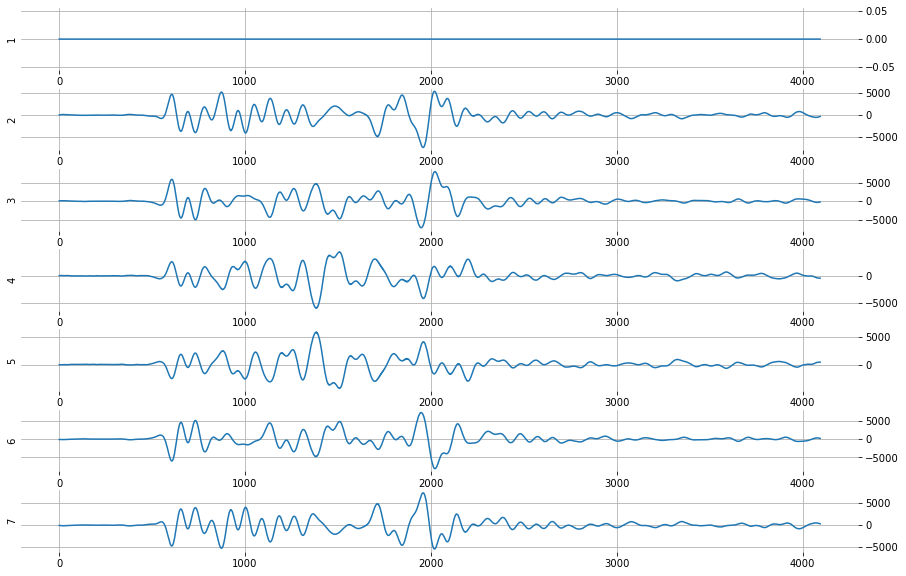

In [51]:
plot_sgrams(dfsi,dfsi.index)

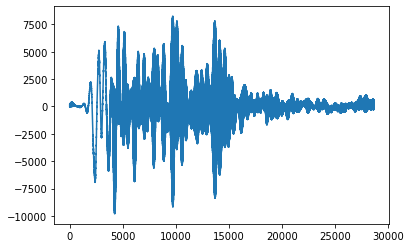

In [60]:
plt.plot(dfsr.values.flatten())

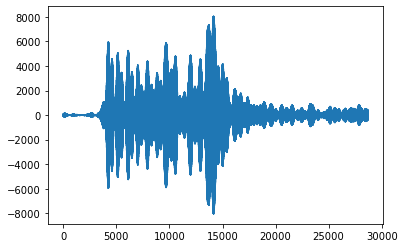

In [62]:
plt.plot(dfsi.values.flatten())

In [8]:
for i in range(1,1279):
    m=np.load('data_npz\\'+str(i)+'.npy')
    mf=np.abs(np.fft.fft(m,axis=0))
    norm_mf=mf/np.abs(mf).max()
    p_out='spectr_npy_norm\\'+str(i)
    np.save(p_out,arr=norm_mf)

# Save full data
#Сохранение всех предобработаных данных и проверка срезов для подачи в модель

In [9]:
for i in range(1,1279):
    m=np.load('data_npy_norm_step\\'+str(i)+'.npy')
    mf=np.load('spectr_npy_norm\\'+str(i)+'.npy')   
    p_out='datafull_npy\\'+str(i)
    np.save(p_out,arr=np.append(m, mf, axis=1))

In [10]:
m=np.load('datafull_npy\\268.npy') 
seicmsemple=m[:,1:4097]
sprctrsemple=m[:,4097:]
lenghtsample=m[:,0]

In [11]:
seicmsemple.shape sprctrsemple.T.shape, lenghtsample.shape

(4096, 7)